# Kaleb Kinder

## Etsy Shop Sales Prediction

### Summary

This project uses data from the Etsy API, which includes the top 10,000 shops by number of sales

As a small business owner on Etsy myself, I wanted to explore features that predicted shop success using multiple linear regression.

#### **Goal**: Uncover features that predict an Etsy Shops total number of sales

#### Database Schema

Number of attributes: 10,000 rows and 7 columns 

Outcome Variable: 

* Total number of sales

Feature Information 

* Average Rating - Average review rating between 1 and 5
* Total Ratings - Total number of reviews left for shop
* Favorites Count - Total number of favorites
* Active listing count - Total number of active listings
* Digital listing count - Total number of digital listingsrg/)


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 1. Data Acquisition

In [188]:
#Define relevant features to explore
column_subset = [
    'shop_name',
    'digital_listing_count',
    'sold_count',
    'active_listing_count',
    'favorites_count',
    'average_rating',
    'total_rating_count'
]

In [189]:
df=pd.read_csv('Etsy_top10000shops.csv',usecols=column_subset,encoding='utf-8')

In [190]:
df.head()

,shop_name,digital_listing_count,sold_count,active_listing_count,favorites_count,average_rating,total_rating_count
0,PlannerKate1,0,1839198,2583,61367,4.9869,239083
1,CaitlynMinimalist,0,1565708,1070,258218,4.8767,267763
2,Beadboat1,0,1461640,8511,59085,4.7952,151056
3,ModParty,1,1285848,1618,115299,4.8728,144615
4,yakutum,0,969314,24293,36700,4.9373,92813


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shop_name              10000 non-null  object 
 1   digital_listing_count  10000 non-null  int64  
 2   sold_count             10000 non-null  int64  
 3   active_listing_count   10000 non-null  int64  
 4   favorites_count        10000 non-null  int64  
 5   average_rating         9993 non-null   float64
 6   total_rating_count     10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


In [192]:
df.describe()

,digital_listing_count,sold_count,active_listing_count,favorites_count,average_rating,total_rating_count
count,10000.000000,1.000000e+04,10000.000000,10000.000000,9993.000000,10000.000000
mean,165.382200,5.348419e+04,851.312800,7625.960200,4.896958,8471.473400
std,624.904367,6.216968e+04,1855.144018,9812.055333,0.107211,10895.584957
min,0.000000,2.272900e+04,0.000000,88.000000,1.000000,411.000000
25%,0.000000,2.806850e+04,167.000000,2388.000000,4.868700,3853.500000
50%,0.000000,3.675000e+04,419.000000,4744.000000,4.924100,5871.000000
75%,2.000000,5.630550e+04,940.000000,9247.500000,4.958300,9281.000000
max,22706.000000,1.839198e+06,83954.000000,258218.000000,5.000000,267763.000000


# 2. Data Cleaning

**2.1 Missing Data**

In [193]:
# Check for the percentage of missing values across features

df.isnull().sum()

#7 missing average_rating values

shop_name                0
digital_listing_count    0
sold_count               0
active_listing_count     0
favorites_count          0
average_rating           7
total_rating_count       0
dtype: int64

In [194]:
#remove shops that do not have an average rating value

df.dropna(inplace=True)
df.isnull().sum()


shop_name                0
digital_listing_count    0
sold_count               0
active_listing_count     0
favorites_count          0
average_rating           0
total_rating_count       0
dtype: int64

**2.2 Duplicate Data**

In [195]:
#Check for duplicate shops
df.duplicated().sum()

#No duplicates, we can move onto EDA

0

**2.3 Remove Extreme Outliers**



In [196]:
from scipy import stats

df = df[(np.abs(stats.zscore(df['sold_count'])) < 3)] #more than 3standard deviations above the mean
df = df[(np.abs(stats.zscore(df['active_listing_count'])) < 3)]

df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)


In [197]:
df.describe()

#Outlier screening removed 259 shops total (less than .5% of data)

,digital_listing_count,sold_count,active_listing_count,favorites_count,average_rating,total_rating_count
count,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000
mean,148.759984,47811.417616,698.067652,7248.663279,4.896997,7656.605482
std,468.607090,31722.568730,835.189479,8488.324227,0.107917,6812.725747
min,0.000000,22729.000000,0.000000,88.000000,1.000000,411.000000
25%,0.000000,27945.000000,164.000000,2362.000000,4.869000,3811.000000
50%,0.000000,36283.000000,408.000000,4652.000000,4.924700,5776.000000
75%,2.000000,54530.000000,899.000000,9008.000000,4.958500,9034.000000
max,6316.000000,240018.000000,5713.000000,121902.000000,5.000000,96387.000000


# 3. EDA
**3.1 Check distribution of the Target variable**

Text(0.5, 1.0, 'Total Sold Count Distribution')

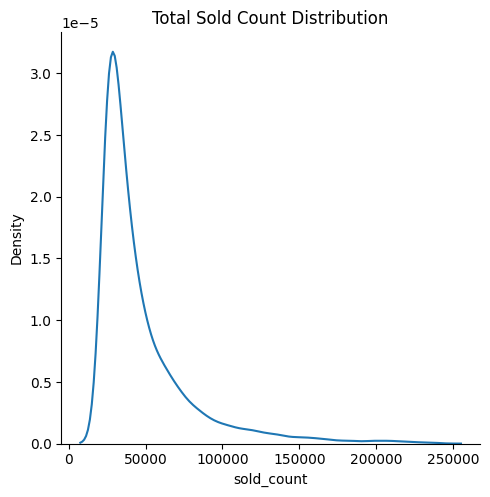

In [198]:
import warnings
warnings.filterwarnings('ignore')

sns.displot(df['sold_count'],kind='kde')
plt.title('Total Sold Count Distribution')

#Distribution skews to the right due to high performing shops, but the target distribution is clearly unimodal

**3.2 Check Feature and Target Correlations**

Text(0.5, 1.0, 'Total Reviews and Total Sales')

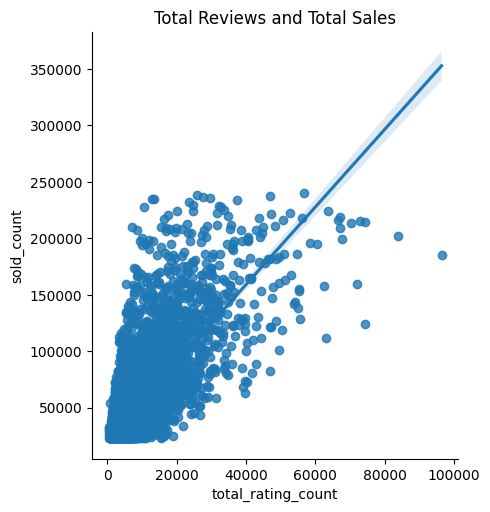

In [199]:
#Total sales and total ratings

sns.lmplot(x='total_rating_count',y='sold_count',data=df)
plt.title('Total Reviews and Total Sales')

#Appears to be a strong positive correlation between total ratings and sales
#This makes sense, since reviews can only happen if a sale occurred

Text(0.5, 1.0, 'Average Reviews and Total Sales')

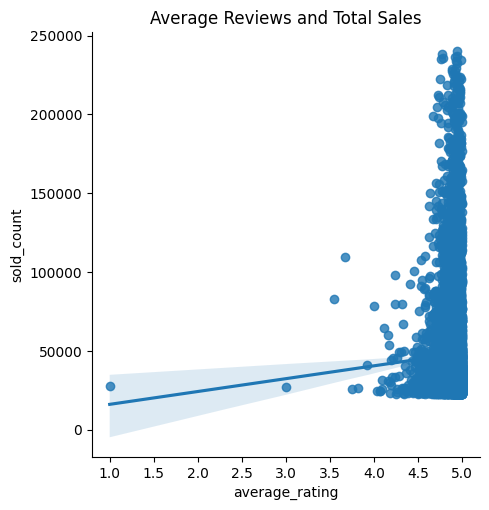

In [200]:
#Total sales and average ratings
sns.lmplot(x='average_rating',y='sold_count',data=df)
plt.title('Average Reviews and Total Sales')

#Most shops reviews are at ceiling level (near 5.0). This is likely a biased sample of average reviews since it leaves out underperforming shops.
#Decision: Remove Average reviews from the model due to ceiling effect

Text(0.5, 1.0, 'Total Active Listings and Total Sales')

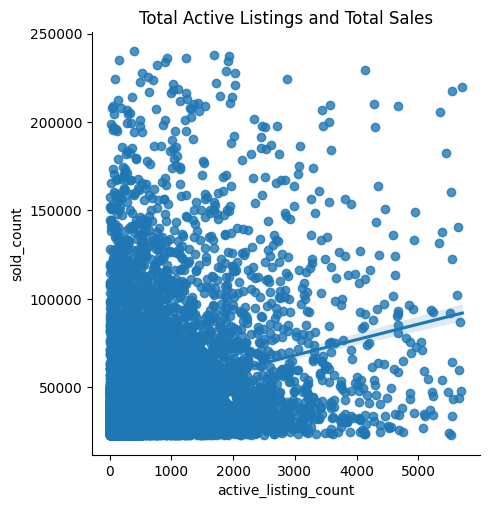

In [201]:
#Total sales and average ratings
sns.lmplot(x='active_listing_count',y='sold_count',data=df)
plt.title('Total Active Listings and Total Sales')

Text(0.5, 1.0, 'Total Favorites and Total Sales')

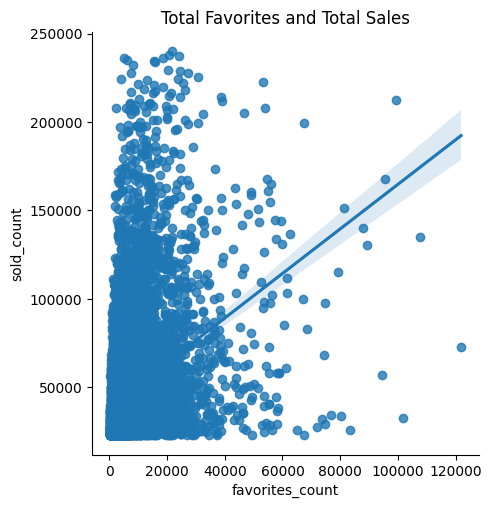

In [202]:
#Total sales and average ratings
sns.lmplot(x='favorites_count',y='sold_count',data=df)
plt.title('Total Favorites and Total Sales')

Text(0.5, 1.0, 'Total Digital Listings and Total Sales')

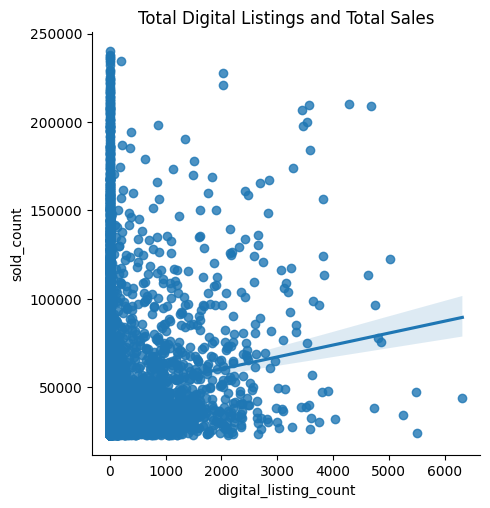

In [203]:
#Total sales and digital listing count
sns.lmplot(x='digital_listing_count',y='sold_count',data=df)
plt.title('Total Digital Listings and Total Sales')

**3.3 Check for Multicollinearity among Features**

<Axes: >

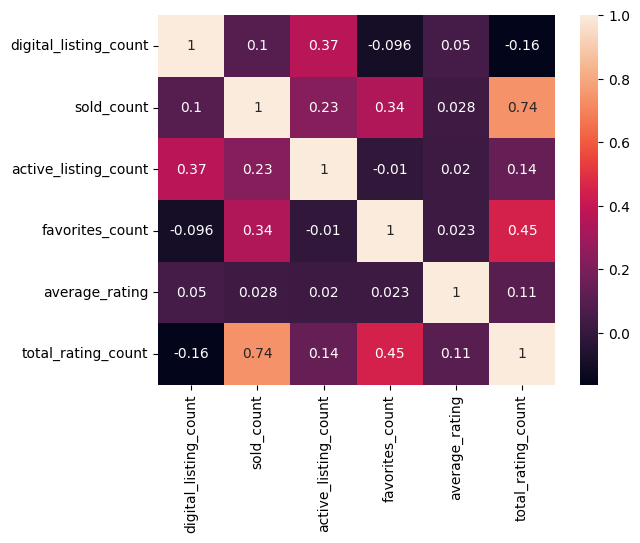

In [204]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#The correlation coefficient between favorites_count and total_rating_count is 0.45. Next let's consider the variance inflation factor (VIF) 

**3.4 Check the VIF score bewtween correlated features**

In [205]:
#Calculate the VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(considered_features):
    
    X = df[considered_features]

    #add a constant feature
    X['intercept'] = 1 
    
    # store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [206]:
# features to consider removing
considered_features = ['total_rating_count','favorites_count']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

#The VIF is low enough (1.24) to continue without worrying too much about multicollinearity

,Variable,VIF
1,favorites_count,1.24817
0,total_rating_count,1.24817


# 4. Data preprocessing

**4.1 Standardize features**

In [207]:
#import library to standardize features

import scipy
from scipy import stats

In [208]:
features = df.drop(['sold_count','shop_name','average_rating'],axis=1) #define features to be normalized

normalized_df = stats.zscore(features) #normalize features

normalized_df['Total Sales'] = df['sold_count'] #put the label into the now normalized dataframe


# 5. Train the Multiple Linear Regression Model to predict Etsy Sales

**5.1 Use sklearn to split the data into a training dataset and a test dataset**

In [209]:
y = normalized_df['Total Sales'] #define outcome/label variable
X = normalized_df.drop(['Total Sales'],axis=1) #define predictor/feature variables

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [211]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# 6. Evaluate the Model

**6.1 Evaluate Beta Coefficients**

In [212]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
digital_listing_count,6294.690927
active_listing_count,1384.605555
favorites_count,726.354360
total_rating_count,23781.718353


* A one standaard deviation increase in **total reviews** is associated with **23,781 more sales**
* A one standaard deviation increase in **digital listing** count is associated with **6,294 more sales**
* A one standaard deviation increase in **active listings** is associated with **1,384 more sales**
* A one standaard deviation increase in **favorites count** is associated with **726 more sales**

**6.2 Evaluate Predicted vs. Actual Sales**

Text(0.5, 1.0, 'Predicted vs Actual Sales Total')

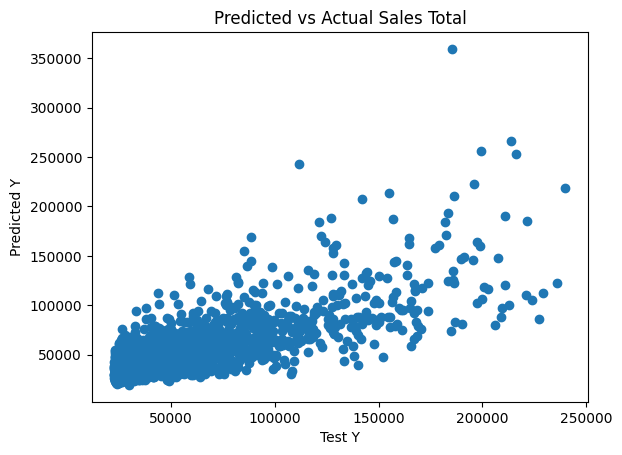

In [213]:
#Compare model predictions to actual test values
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs Actual Sales Total')

In [214]:
#Correlation between Predicted and Actual Sales

pearson = np.corrcoef(y_test,predictions)
print(pearson[1][0])


0.7787478479828918


* Predicted and actual sales were highly correlated (r = .778)

**6.3 Check the distribution of the residuals**

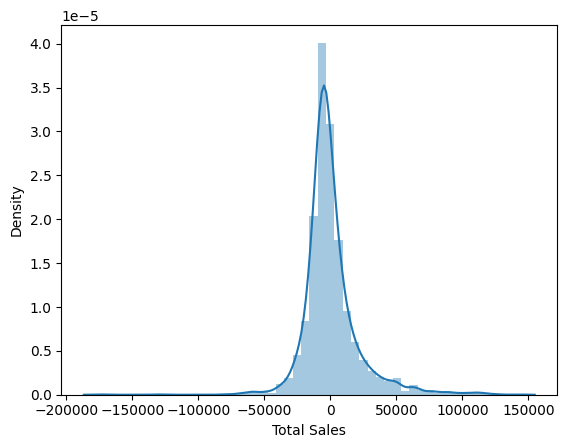

In [215]:
sns.distplot((y_test-predictions),bins=50);

#Residuals are normally distributed

In [216]:
#Regression Evaluation Metrics

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 21006.908265542595


* This RMSE is high considering the mean value of total sales (63,000). More data and feature engineering is needed to reduce model error. Some feature to include might be sales categories, shop open date, sales descriptions

**6.4 Check Model Summary and Beta Coefficient Significance**

In [217]:
import statsmodels.api as sm

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3601.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:31:32   Log-Likelihood:            -1.1036e+05
No. Observations:                9741   AIC:                         2.207e+05
Df Residuals:                    9736   BIC:                         2.208e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.781e+

* Each feature significantly impacted sales while controlling for other features (p < .001)

# 7. Create Dashboard & Evaluate Features

In [ ]:
from explainerdashboard import InlineExplainer,RegressionExplainer


#create an explainer object
explainer = RegressionExplainer(lm, X_test, y_test)
ie = InlineExplainer(explainer,port=8052)

In [ ]:
ie.importances()

#Total Review count was the most predictive of sales

In [ ]:
ie.model_stats()

In [ ]:
ie.tab.contributions()

In [ ]:
ie.tab.whatif()

# 8. Conclusion

* Total Review count was the most important feature for predicting sales. This makes sense since a review can only occur if a sale occurs. 

* Digital listing count was the second most important feature for predicting sales. This insight could be used to focus more on digital items for etsy or other ecommerce shop owners

* Predicted and actual sales were highly correlated (r = .778), however model error was high in relation to the median value of sales

* Future steps may include further feature engineering and scraping of relevant sales features to expand on this model